In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("incl/")

import ELPH_dyn
import ELPH_utils


#global hyperparameters
kmax = 4.
n_kmax = 80

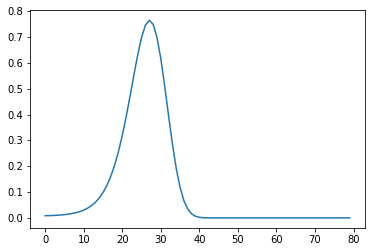

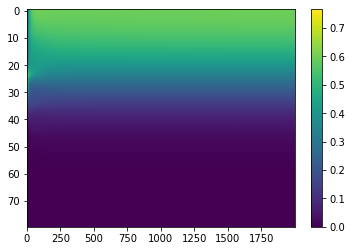

In [2]:
init = ELPH_dyn.get_init_cond_gauss(kmax = kmax, n_kmax = n_kmax, max_pos = 0.15, width = 0.05, density=0.1)
plt.plot(init[:n_kmax])
plt.show()

nkdyn = ELPH_dyn.get_el_dynamics(init, n_kmax = n_kmax)
plt.imshow(nkdyn, aspect='auto')
plt.colorbar()
plt.show()

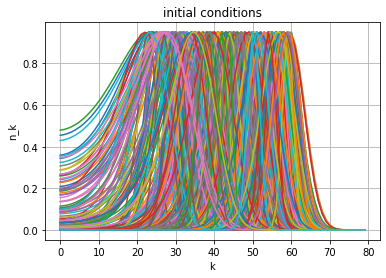

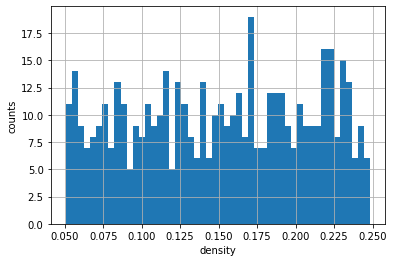

In [3]:
n_runs = 500

rng = np.random.default_rng(817)

paras = np.zeros((n_runs,3))

paras[:,0] = rng.uniform(low=0.1, high=0.7, size=n_runs)
paras[:,1] = rng.uniform(low=0.02, high=0.1, size=n_runs)
paras[:,2] = 0.1

inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)


for r in range(n_runs):
    dist_max = np.amax(inits[r][:n_kmax])
    inits[r][:n_kmax] *= 0.95 / dist_max
    paras[r,2] = ELPH_dyn.get_density_from_state(inits[r][:n_kmax], kmax/n_kmax)

    
plt.grid()
for r in range(n_runs):
    plt.plot(inits[r][:n_kmax])
plt.xlabel('k')
plt.ylabel('n_k')
plt.title('initial conditions')
plt.show()

plt.grid()
plt.hist(paras[:,2],bins=n_runs//10)
plt.xlabel('density')
plt.ylabel('counts')
plt.show()

In [4]:
runs = ELPH_utils.get_runs(kmax, n_kmax, inits, tmax=2000, n_tmax=400)

run  1  from  500
run  2  from  500
run  3  from  500
run  4  from  500
run  5  from  500
run  6  from  500
run  7  from  500
run  8  from  500
run  9  from  500
run  10  from  500
run  11  from  500
run  12  from  500
run  13  from  500
run  14  from  500
run  15  from  500
run  16  from  500
run  17  from  500
run  18  from  500
run  19  from  500
run  20  from  500
run  21  from  500
run  22  from  500
run  23  from  500
run  24  from  500
run  25  from  500
run  26  from  500
run  27  from  500
run  28  from  500
run  29  from  500
run  30  from  500
run  31  from  500
run  32  from  500
run  33  from  500
run  34  from  500
run  35  from  500
run  36  from  500
run  37  from  500
run  38  from  500
run  39  from  500
run  40  from  500
run  41  from  500
run  42  from  500
run  43  from  500
run  44  from  500
run  45  from  500
run  46  from  500
run  47  from  500
run  48  from  500
run  49  from  500
run  50  from  500
run  51  from  500
run  52  from  500
run  53  from  500
ru

run  417  from  500
run  418  from  500
run  419  from  500
run  420  from  500
run  421  from  500
run  422  from  500
run  423  from  500
run  424  from  500
run  425  from  500
run  426  from  500
run  427  from  500
run  428  from  500
run  429  from  500
run  430  from  500
run  431  from  500
run  432  from  500
run  433  from  500
run  434  from  500
run  435  from  500
run  436  from  500
run  437  from  500
run  438  from  500
run  439  from  500
run  440  from  500
run  441  from  500
run  442  from  500
run  443  from  500
run  444  from  500
run  445  from  500
run  446  from  500
run  447  from  500
run  448  from  500
run  449  from  500
run  450  from  500
run  451  from  500
run  452  from  500
run  453  from  500
run  454  from  500
run  455  from  500
run  456  from  500
run  457  from  500
run  458  from  500
run  459  from  500
run  460  from  500
run  461  from  500
run  462  from  500
run  463  from  500
run  464  from  500
run  465  from  500
run  466  from  500


In [5]:
ELPH_utils.save_runs(runs, filename='../runs_rand_inits')

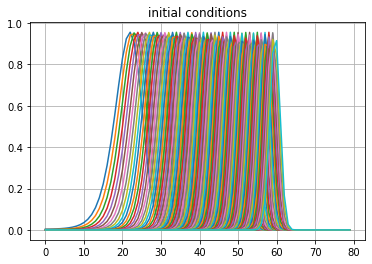

In [9]:
n_runs = 100

paras = np.zeros((n_runs,3))

paras[:,0] = np.linspace(0.1,0.7,n_runs) #max_pos
paras[:,1] = 0.03 #width
paras[:,2] = 0.075 #density

#test initial conditions
inits = ELPH_utils.get_gaussian_inits(kmax, n_kmax, paras)

plt.grid()
for k in range(n_runs):
    plt.plot(inits[k][:n_kmax])

plt.title('initial conditions')
plt.show()


In [14]:


runs = ELPH_utils.get_runs_gaussian_init(kmax, n_kmax, paras, tmax=2000, n_tmax=400)

run  1  from  100
run  2  from  100
run  3  from  100
run  4  from  100
run  5  from  100
run  6  from  100
run  7  from  100
run  8  from  100
run  9  from  100
run  10  from  100
run  11  from  100
run  12  from  100
run  13  from  100
run  14  from  100
run  15  from  100
run  16  from  100
run  17  from  100
run  18  from  100
run  19  from  100
run  20  from  100
run  21  from  100
run  22  from  100
run  23  from  100
run  24  from  100
run  25  from  100
run  26  from  100
run  27  from  100
run  28  from  100
run  29  from  100
run  30  from  100
run  31  from  100
run  32  from  100
run  33  from  100
run  34  from  100
run  35  from  100
run  36  from  100
run  37  from  100
run  38  from  100
run  39  from  100
run  40  from  100
run  41  from  100
run  42  from  100
run  43  from  100
run  44  from  100
run  45  from  100
run  46  from  100
run  47  from  100
run  48  from  100
run  49  from  100
run  50  from  100
run  51  from  100
run  52  from  100
run  53  from  100
ru

In [15]:
ELPH_utils.save_runs(runs, filename='../runs_w0.03')